In [1]:
import numpy as np
import scipy as sp
from scipy.fft import fft
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#W/m^2*Ansgstrom, microns
earth_wave, earth_flux = np.loadtxt('CatalogofSolarSystemObjects/Spectra/NativeResolution/Sun/Earth_Lundock081121_Spec_Sun_HiRes.txt', unpack=True)
mars_wave, mars_flux = np.loadtxt('CatalogofSolarSystemObjects/Spectra/NativeResolution/Sun/Mars_McCord1971_Spec_Sun_HiRes.txt', unpack=True)
jupiter_wave, jupiter_flux = np.loadtxt('CatalogofSolarSystemObjects/Spectra/NativeResolution/Sun/Jupiter_Lundock080507_Spec_Sun_HiRes.txt', unpack=True)

In [3]:
#interpolate spectra
int_earth = interp1d(earth_wave, earth_flux, kind='nearest')
int_mars = interp1d(mars_wave, mars_flux, kind='nearest')
int_jupiter = interp1d(jupiter_wave, jupiter_flux, kind='nearest')

In [4]:
#where to truncate wavelength
start = max(min(earth_wave), min(mars_wave), min(jupiter_wave))
stop = min(max(earth_wave), max(mars_wave), max(jupiter_wave))

wave_new = np.linspace(start, stop, num=1000)

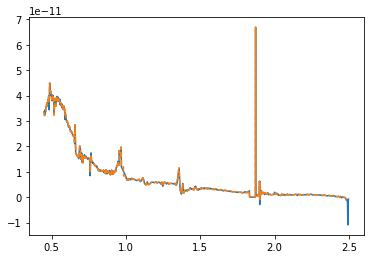

In [5]:
plt.plot(earth_wave, earth_flux, label='Earth')
plt.plot(wave_new, int_earth(wave_new), label='interp', linestyle='--')

In [6]:
#take Fourier transform of spectrum
pow1 = fft(int_earth(wave_new))
pow2 = fft(int_mars(wave_new))
 
#get modal fractions
p, q = pow1*np.conj(pow1)/np.nansum(pow1*np.conj(pow1)), pow2*np.conj(pow2)/np.nansum(pow2*np.conj(pow2))
p,q = np.real(p), np.real(q) #force Python to drop the "+0j" part
    
#get D_JS and D_JS density of spectra
r = 1/2 * (p+q)

Djs = 1/2 * np.nansum(p*np.log(p/r)) + 1/2 * np.nansum(1*np.log(q/r))

Djs_dens = 1/2 * p*np.log(p/r) + 1/2 * 1*np.log(q/r)

/opt/anaconda3/envs/axiclasspy/lib/python3.9/site-packages/numpy/core/_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


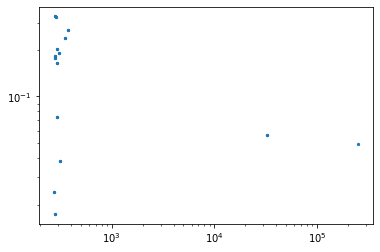

In [7]:
c = 3e8
freq = c / (wave_new*1e6)
time = fft(freq)
plt.scatter(time, Djs_dens,s=5)
plt.xscale('log')
plt.yscale('log')

In [68]:
print(len(time))

1000


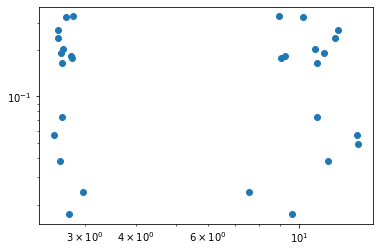

In [12]:
wavenumber = 2*np.pi/wave_new

plt.xscale('log')
plt.yscale('log')

plt.scatter(wavenumber, Djs_dens)